## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a Long Short Term Memory networks – usually just called “LSTMs” to predict the closing price of the S&P 500 using a dataset of past prices







In [ ]:
import pandas as pd
import datetime
import numpy as np


Step 1: get the data of desired firm from Google Finance.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/google.csv')
print(data.head())


        Date    Open    High     Low   Close   Volume
0  30-Jun-17  943.99  945.00  929.61  929.68  2287662
1  29-Jun-17  951.35  951.66  929.60  937.82  3206674
2  28-Jun-17  950.66  963.24  936.16  961.01  2745568
3  27-Jun-17  961.60  967.22  947.09  948.09  2443602
4  26-Jun-17  990.00  993.99  970.33  972.09  1517912


In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,3145.000000,3145.000000,3145.000000,3145.000000,3.145000e+03
mean,382.514169,385.872099,378.737126,382.350248,4.205708e+06
std,213.520466,214.636421,212.113835,213.469899,3.878100e+06
min,87.740000,89.290000,86.370000,87.580000,5.211410e+05
25%,232.380000,234.890000,230.400000,232.440000,1.889613e+06
50%,296.280000,298.520000,293.640000,296.050000,2.811069e+06
75%,544.000000,548.220000,539.850000,543.650000,5.232088e+06
max,1005.490000,1008.610000,996.620000,1004.280000,4.118289e+07


In [ ]:
len(data)

3145

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def get_normalize_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features

    scaler = MinMaxScaler()
    numerical = ['Open', 'Close', 'Volume']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data


def remove_data(data):
    """
    Remove columns from the data
    :param data: a record of all the stock prices with columns as  ['Date','Open','High','Low','Close','Volume']
    :return: a DataFrame with columns as  ['index','Open','Close','Volume']
    """
    # Define columns of data to keep from historical stock data

    item = []
    open = []
    close = []
    volume = []

    # Loop through the stock data objects backwards and store factors we want to keep

    i_counter = 0

    for i in range(len(data) - 1, -1, -1):
        item.append(i_counter)
        open.append(data['Open'][i])
        close.append(data['Close'][i])
        volume.append(data['Volume'][i])
        i_counter += 1

        # Create a data frame for stock data

    stocks = pd.DataFrame()

        # Add factors to data frame

    stocks['item'] = item
    stocks['Open'] = open
    stocks['Close'] = pd.to_numeric(close)
    stocks['Volume'] = pd.to_numeric(volume)

    return stocks


Step 2 : Remove Unncessary data, i.e., Date and High value

In [ ]:
stocks = remove_data(data)


In [ ]:
#Print the dataframe head and tail
print(stocks.head(5))
print("---")
print(stocks.tail(5))

   item    Open   Close    Volume
0     0   98.80  101.46  15860692
1     1  100.77   97.35  13762396
2     2   96.82   96.85   8239545
3     3   97.72   94.37  10389803
4     4   95.42   97.02   9666175
---
      item    Open   Close   Volume
3140  3140  990.00  972.09  1517912
3141  3141  961.60  948.09  2443602
3142  3142  950.66  961.01  2745568
3143  3143  951.35  937.82  3206674
3144  3144  943.99  929.68  2287662


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (18, 12)

def price(x):
    """
    format the coords message box
    :param x: data to be formatted
    :return: formatted data
    """
    return '$%1.2f' % x


def plot_basics(stocks, title = 'Google_trading', y_label='Price USD', x_label='Trading Days'):
    """
    Plots basic pyplot
    :param stocks: DataFrame having all the necessary data
    :param title:  Title of the plot 
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """

    fig, ax = plt.subplots()
    ax.plot(stocks['item'], stocks['Close'], '#0A7388')

    ax.format_ydata = price
    ax.set_title(title)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()



def plot_prediction(actual, prediction, title='Google Trading vs Prediction', y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')

    plt.show()


def plot_lstm_prediction(actual, prediction, title='Google Trading vs Prediction', y_label='Price USD', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')


    plt.show()

In [ ]:
# Visualise raw data.

plot_basics(stocks)

In [ ]:
stocks = get_normalize_data(stocks)
print(stocks.head())

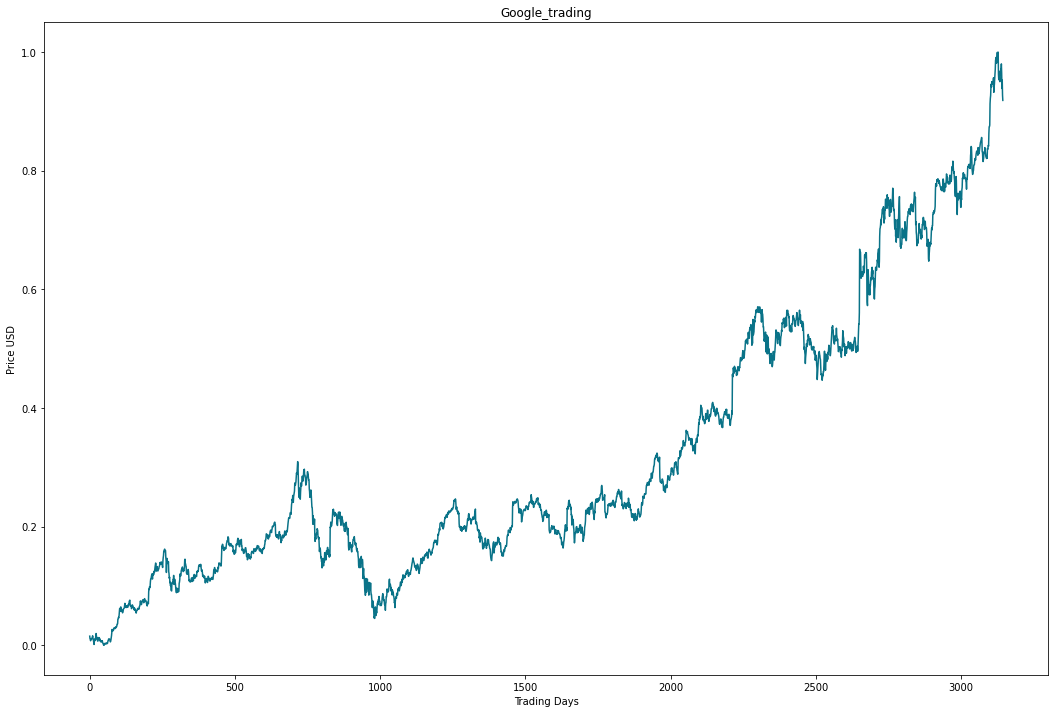

In [ ]:
#  Visualize the data again

plot_basics(stocks)

In [ ]:
stocks.to_csv('google_preprocessed.csv',index= False)

## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

## Basic LSTM Model

First lets make a basic LSTM model.

Step 1 : import keras libraries for smooth implementaion of lstm

In [ ]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [ ]:
stocks_data = stocks.drop(['item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


Step 2 : Split train and test data sets and Unroll train and test data for lstm model

In [ ]:
import numpy as np
import math


def scale_range(x, input_range, target_range):
    """
    Rescale a numpy array from input to target range
    :param x: data to scale
    :param input_range: optional input range for data: default 0.0:1.0
    :param target_range: optional target range for data: default 0.0:1.0
    :return: rescaled array, incoming range [min,max]
    """

    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range



def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
    """
        Split the data set into training and testing feature for Long Short Term Memory Model
        :param stocks: whole data set containing ['Open','Close','Volume'] features
        :param prediction_time: no of days
        :param test_data_size: size of test data to be used
        :param unroll_length: how long a window should be used for train test split
        :return: X_train : training sets of feature
        :return: X_test : test sets of feature
        :return: y_train: training sets of label
        :return: y_test: test sets of label
    """
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].values
    y_train = stocks[prediction_time:-test_data_cut]['Close'].values

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].values
    y_test = stocks[prediction_time - test_data_cut:]['Close'].values

    return x_train, x_test, y_train, y_test


def unroll(data, sequence_length=24):
    """
    use different windows for testing and training to stop from leak of information in the data
    :param data: data set to be used for unrolling
    :param sequence_length: window length
    :return: data sets with different window.
    """
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


def build_improved_model(input_dim, output_dim, return_sequences):
    """
    Builds an improved Long Short term memory model using keras.layers.recurrent.lstm
    :param input_dim: input dimension of model
    :param output_dim: ouput dimension of model
    :param return_sequences: return sequence for the model
    :return: a 3 layered LSTM model
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model


def build_basic_model(input_dim, output_dim, return_sequences):
    """
    Builds a basic lstm model 
    :param input_dim: input dimension of the model
    :param output_dim: output dimension of the model
    :param return_sequences: return sequence of the model
    :return: a basic lstm model with 3 layers.
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model

In [ ]:
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


Step 3 : Build a basic Long-Short Term Memory model

In [ ]:
# build basic lstm model
import time
model = build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.005735635757446289


Step 4: Train the model

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

77/77 [==============================] - 38s 392ms/step - loss: 0.0037 - val_loss: 3.5957e-04


Step 5: make prediction using test data

In [ ]:
predictions = model.predict(X_test)

Step 6: Plot the results

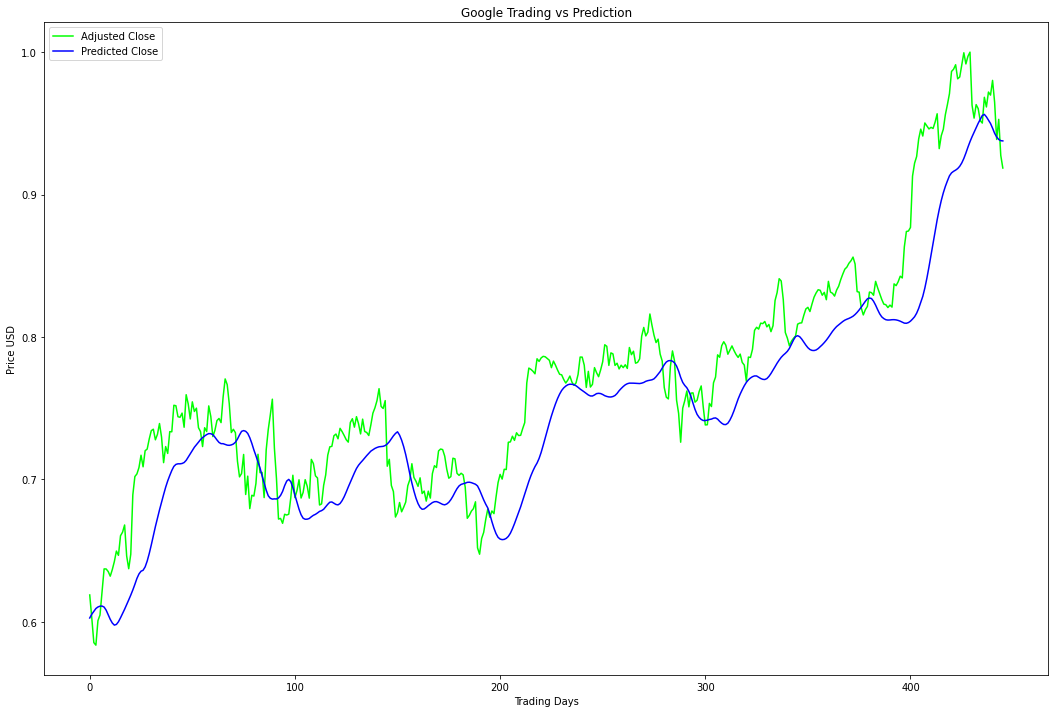

In [ ]:
plot_lstm_prediction(y_test,predictions)

Step 7: Get the test score.

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00034032 MSE (0.01844777 RMSE)
Test Score: 0.00149296 MSE (0.03863884 RMSE)


### Improved LSTM Model

Step 1: Build an improved LSTM model

In [ ]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.005610227584838867


Step 2: Train improved LSTM model

In [ ]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
25/25 - 16s - loss: 0.0078 - val_loss: 9.6190e-04 - 16s/epoch - 650ms/step
Epoch 2/5
25/25 - 14s - loss: 9.1596e-04 - val_loss: 0.0010 - 14s/epoch - 580ms/step
Epoch 3/5
25/25 - 11s - loss: 7.1575e-04 - val_loss: 2.6744e-04 - 11s/epoch - 434ms/step
Epoch 4/5
25/25 - 15s - loss: 6.8043e-04 - val_loss: 2.8214e-04 - 15s/epoch - 596ms/step
Epoch 5/5
25/25 - 13s - loss: 6.5298e-04 - val_loss: 2.7340e-04 - 13s/epoch - 528ms/step


Step 3: Make prediction on improved LSTM model

In [ ]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

Step 4: plot the results

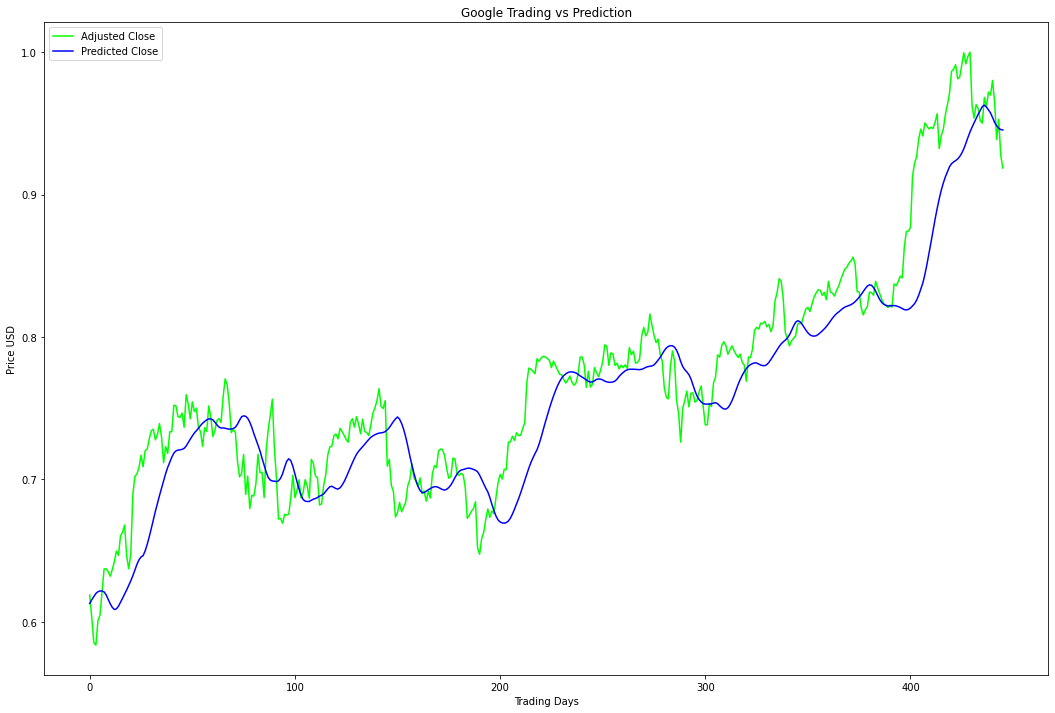

In [ ]:
plot_lstm_prediction(y_test,predictions)

Step 5: Get the test score

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 0.00031661 MSE (0.01779353 RMSE)
Test Score: 0.00112188 MSE (0.03349455 RMSE)


In [ ]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.001122 - RMSE * Adjusted Close Range
